#### Tarefa **Supervisionada** de CLASSIFICAÇÃO de Espécie de Flor IRIS, a partir de medidas (cm) de sua pétala e de sua sépala
*neste caso o dataset possui 4 variáveis de decisão (x, espessura (width) e comprimento (length)), denominadas em IA de características ou features.*

<img src='img/irisimg.png' width=80%></img>

In [2]:
import pandas as pd
import seaborn as sb 
df = pd.read_csv('datasets/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


As features contínuas com as medidas estão ok. A coluna alvo para a maioria dos algoritmos de classificação, é interessante ser convertida para número inteiro positivo, o processo de codificação (encoding)

In [5]:
#Vamos fazer a mudança de tipo da coluna alvo usando LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['target_class'] = le.fit_transform(df['Species']) #ajusta a função aos dados

In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target_class
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


Este é o dataframe processado e completo, mas para o algoritmo Árvore de Decisão, vamos deixar apenas as colunas numéricas das features, pois a target é a espécie (y), que está convertida para número

In [7]:
features = ['SepalLengthCm', 'SepalLengthCm', 'PetalLengthCm','PetalLengthCm']
X = df[features]
y = df['target_class']

Vamos TREINAR o nosso classificador com uma parte dos dados e deixar outra parte dos dados para TESTAR, ou seja, dados que não participaram do treinamento

In [8]:
#dividindo a base de dados para um teste simples por enquanto
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = DecisionTreeClassifier(random_state=30) #valor fixo para permitir repetir o resultado
model_dtree.fit(X_train,y_train)

y_train_pred = model_dtree.predict(X_train)
y_test_pred = model_dtree.predict(X_test)

In [11]:
from sklearn import metrics
print(metrics.classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.99        34
           2       1.00      0.97      0.98        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



Naturalmente é esperada alta acurácia no TREINO!

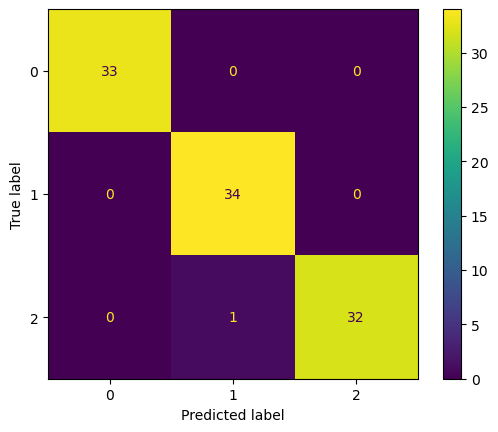

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_1 = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1,
                              display_labels=model_dtree.classes_)
disp.plot()

Mas precisamos ver no conjunto de TESTE

In [12]:
print(metrics.classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        16
           2       0.94      0.94      0.94        17

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



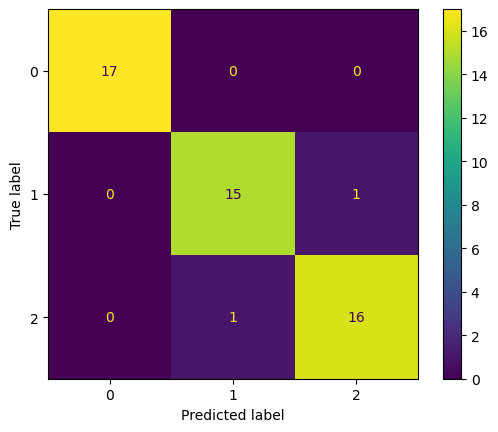

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_2 = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2,
                              display_labels=model_dtree.classes_)
disp.plot()

O modelo de árvore de decisão não exige alterações nas features e possui boa interpretabilidade. Vamos ver a árvore que foi gerada pelo algoritmo para DECIDIR a classe dominante